<div style="background-color: #eee3d3">
<h1> 6-clustering.ipynb </h1>
</div>

---

# The purpose of this notebook is to use different methods to reduce 

- ## KMeans
    - ### cluster samples
    - ### cluster features
   

---

## References 

- https://pubmed.ncbi.nlm.nih.gov/30421236/
- https://pubs.acs.org/doi/10.1021/acs.analchem.9b03084

# Import modules

In [60]:
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl


import numpy as np
import pandas as pd

import cimcb_lite as cb

import time

In [61]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [62]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/analyse_Agilent', '', pwd[0])
print(f'Working directory : {pwd}')

Working directory : /home/jovyan/work/


In [63]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 12, 8

sns.set_theme(style="darkgrid")

# Import data

## peak table imputed with 1's

In [80]:
peakTable_imp1 = pd.read_csv('peakTable-Agilent-imp1.csv', sep=',', decimal='.', na_values='NA')
peakTable_imp1

,SampleID_full,SampleID,Id_Bma,Idepic,Idepic_Bio,Idepic_Samp,Id Aliquot,CaseCtrl,Typ_Tumo,Match_Caseset,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,EPIC_Liver_Cancer_NR160614_001_Blank_001,Blank_001,NaN,NaN,NaN,NaN,NaN,Blank,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
1,EPIC_Liver_Cancer_NR160614_101_Blank_101,Blank_101,NaN,NaN,NaN,NaN,NaN,Blank,NaN,NaN,...,1,1,1429,1,1,1,1,1,1,1
2,EPIC_Liver_Cancer_NR160614_201_Blank_201,Blank_201,NaN,NaN,NaN,NaN,NaN,Blank,NaN,NaN,...,1,1,1685,1,1,1,1,1,1,1
3,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,LivCan_153,41-LivCan_153,41____41041872,41____41041872,41041872-s2#C1,41041872-s2#C,Incident,HCC,82.0,...,1,98959,20987,178906,1,184072,2547,6454,1,149023
4,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,LivCan_154,41-LivCan_154,41____41046868,41____41046868,41046868-s2#C1,41046868-s2#C,Non-case,Non-case,82.0,...,2414,93145,28323,1,1,1,1043,6390,403011,164386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,LivCan_080,275_32-LivCan_080_275,32____3208004E,32____32253231,32253231-s3#C1,32253231-s3#C,Non-case,Non-case,56.0,...,1,97137,24680,96880,1965,1,1781,40682,228548,111077
185,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,LivCan_375,281_22-LivCan_375_281,22____22281416,22____22281416,22281416-s1#B1,22281416-s1#B,Incident,HCC,383.0,...,4823,1,17378,93893,9988,87218,9131,1,221296,97565
186,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,LivCan_376,282_22-LivCan_376_282,22____22281701,22____22281701,22281701-s1#B1,22281701-s1#B,Non-case,Non-case,383.0,...,4761,1,16624,108831,3127,1,2387,17483,369559,1
187,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,LivCan_165,283_71-LivCan_165_283,71____71000825,71____71000065,71000065-s2#C1,71000065-s2#C,Incident,HCC,147.0,...,38674,89525,11619,105422,3152,89313,2485,14052,212520,1


In [81]:
metadata = peakTable_imp1.loc[:, :'Wcrf_Pf_Cal']
print(metadata.shape)
intensities = peakTable_imp1.drop(metadata.columns, axis=1)
print(intensities.shape)

(189, 118)
(189, 1215)


## Plot PCA only with intensities (no metadata)

In [82]:
cb.plot.pca(intensities, pcx=1, pcy=2, group_label=peakTable_imp1['CaseCtrl'])

Loading BokehJS ...

## peak table with only quantitative columns

In [83]:
peakTable_quanti = peakTable_imp1.drop(peakTable_imp1.dtypes[peakTable_imp1.dtypes == 'object'].index, axis=1)
peakTable_quanti

,Match_Caseset,Age_Blood,Cntr_A,Cntr_B,Cntr_C,Cntr_D,Cntr_E,Country,Py,Adipo_LIVE_02,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1429,1,1,1,1,1,1,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1685,1,1,1,1,1,1,1
3,82.0,72.994,41.0,41.0,41.0,41.0,41.0,4.0,6.940,2.48,...,1,98959,20987,178906,1,184072,2547,6454,1,149023
4,82.0,72.966,41.0,41.0,41.0,41.0,41.0,4.0,17.506,10.10,...,2414,93145,28323,1,1,1,1043,6390,403011,164386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,56.0,66.445,3.0,32.0,32.0,32.0,3.0,3.0,5.440,2.94,...,1,97137,24680,96880,1965,1,1781,40682,228548,111077
185,383.0,71.619,2.0,22.0,22.0,22.0,20.0,2.0,8.572,NaN,...,4823,1,17378,93893,9988,87218,9131,1,221296,97565
186,383.0,71.543,2.0,22.0,22.0,22.0,20.0,2.0,14.185,NaN,...,4761,1,16624,108831,3127,1,2387,17483,369559,1
187,147.0,51.340,71.0,71.0,71.0,71.0,7.0,7.0,4.066,4.35,...,38674,89525,11619,105422,3152,89313,2485,14052,212520,1


(189, 1306)


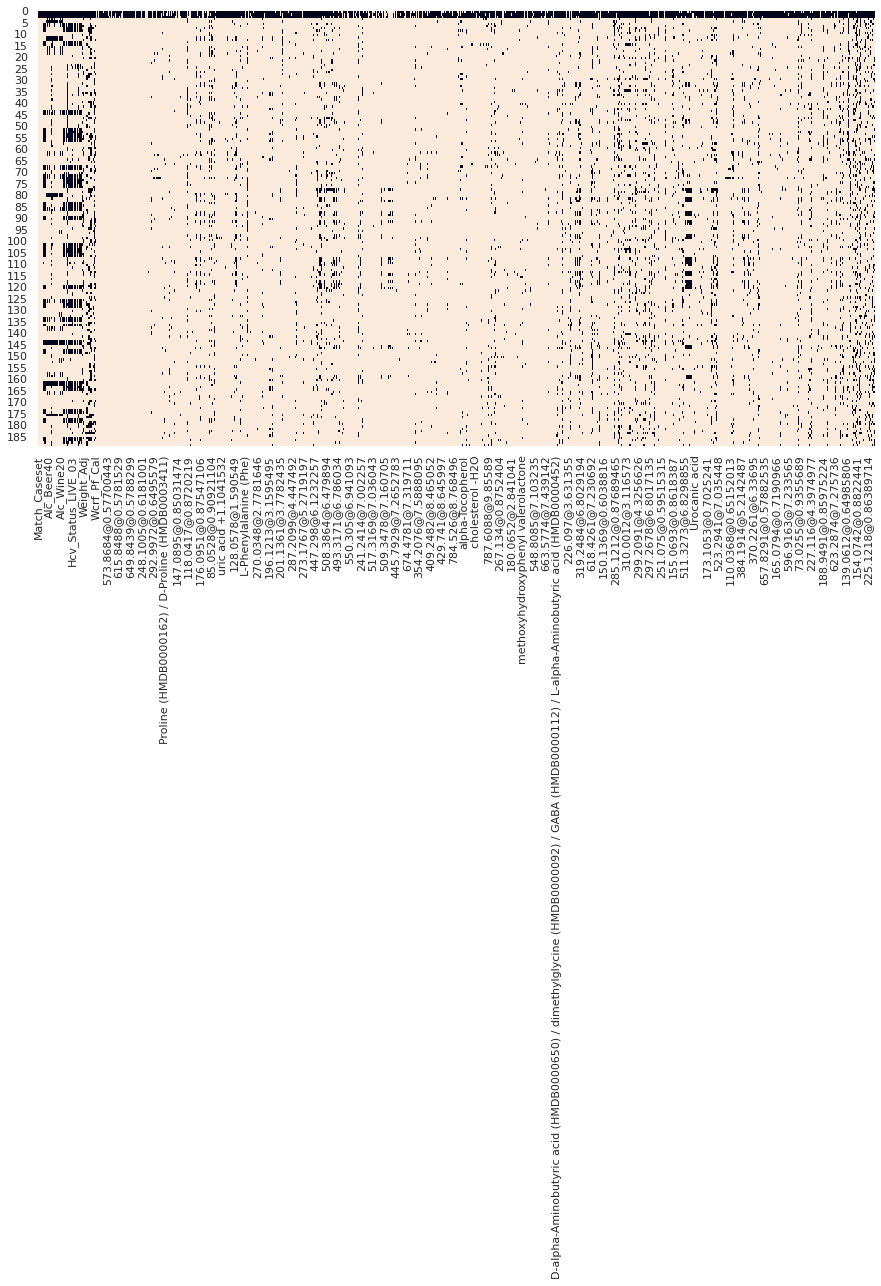

In [84]:
plt.figure(figsize=(15,8))
print(peakTable_quanti.shape)
sns.heatmap((peakTable_quanti.notna()) & (peakTable_quanti != 1), cbar=False);

### We drop *Blanks* rows

In [88]:
peakTable_quanti_no_Blanks = peakTable_quanti.iloc[3:, :]
peakTable_quanti_no_Blanks
# We keep index like that to link rows of *peakTable_quanti* and *peakTable_quanti_no_Blanks*

,Match_Caseset,Age_Blood,Cntr_A,Cntr_B,Cntr_C,Cntr_D,Cntr_E,Country,Py,Adipo_LIVE_02,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
3,82.0,72.994,41.0,41.0,41.0,41.0,41.0,4.0,6.940,2.48,...,1,98959,20987,178906,1,184072,2547,6454,1,149023
4,82.0,72.966,41.0,41.0,41.0,41.0,41.0,4.0,17.506,10.10,...,2414,93145,28323,1,1,1,1043,6390,403011,164386
5,427.0,53.977,41.0,41.0,41.0,41.0,41.0,4.0,12.559,NaN,...,1,93997,16393,171962,1,125149,1,9443,1,99967
6,427.0,53.544,41.0,41.0,41.0,41.0,41.0,4.0,16.950,NaN,...,1378,93555,1,1,4293,140514,4280,5900,399109,164202
7,376.0,64.559,2.0,21.0,21.0,21.0,20.0,2.0,8.151,NaN,...,1,96460,1,158917,9750,154104,12004,1,264003,105903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,56.0,66.445,3.0,32.0,32.0,32.0,3.0,3.0,5.440,2.94,...,1,97137,24680,96880,1965,1,1781,40682,228548,111077
185,383.0,71.619,2.0,22.0,22.0,22.0,20.0,2.0,8.572,NaN,...,4823,1,17378,93893,9988,87218,9131,1,221296,97565
186,383.0,71.543,2.0,22.0,22.0,22.0,20.0,2.0,14.185,NaN,...,4761,1,16624,108831,3127,1,2387,17483,369559,1
187,147.0,51.340,71.0,71.0,71.0,71.0,7.0,7.0,4.066,4.35,...,38674,89525,11619,105422,3152,89313,2485,14052,212520,1


### We impute missing values in metadata with half minimum value in column

In [89]:
peakTable_quanti_no_Blanks_imphalfmin = peakTable_quanti_no_Blanks.fillna(value=peakTable_quanti_no_Blanks.min()/2)
peakTable_quanti_no_Blanks_imphalfmin

,Match_Caseset,Age_Blood,Cntr_A,Cntr_B,Cntr_C,Cntr_D,Cntr_E,Country,Py,Adipo_LIVE_02,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
3,82.0,72.994,41.0,41.0,41.0,41.0,41.0,4.0,6.940,2.48,...,1,98959,20987,178906,1,184072,2547,6454,1,149023
4,82.0,72.966,41.0,41.0,41.0,41.0,41.0,4.0,17.506,10.10,...,2414,93145,28323,1,1,1,1043,6390,403011,164386
5,427.0,53.977,41.0,41.0,41.0,41.0,41.0,4.0,12.559,0.71,...,1,93997,16393,171962,1,125149,1,9443,1,99967
6,427.0,53.544,41.0,41.0,41.0,41.0,41.0,4.0,16.950,0.71,...,1378,93555,1,1,4293,140514,4280,5900,399109,164202
7,376.0,64.559,2.0,21.0,21.0,21.0,20.0,2.0,8.151,0.71,...,1,96460,1,158917,9750,154104,12004,1,264003,105903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,56.0,66.445,3.0,32.0,32.0,32.0,3.0,3.0,5.440,2.94,...,1,97137,24680,96880,1965,1,1781,40682,228548,111077
185,383.0,71.619,2.0,22.0,22.0,22.0,20.0,2.0,8.572,0.71,...,4823,1,17378,93893,9988,87218,9131,1,221296,97565
186,383.0,71.543,2.0,22.0,22.0,22.0,20.0,2.0,14.185,0.71,...,4761,1,16624,108831,3127,1,2387,17483,369559,1
187,147.0,51.340,71.0,71.0,71.0,71.0,7.0,7.0,4.066,4.35,...,38674,89525,11619,105422,3152,89313,2485,14052,212520,1


### Dataframe *peakTable_quanti_no_Blanks_imphalfmin* :
- #### has been imputed with :
    - #### 1's in intensities
    - #### half minimum of column in metadata
- #### has shape (186 rows × 1306 columns) :
    - #### 186 rows = samples
    - #### 1306 columns = 91 metadata + 1215 of intensities

In [90]:
cb.plot.pca(peakTable_quanti_no_Blanks_imphalfmin, pcx=1, pcy=2, group_label=peakTable_imp1.loc[3:, 'CaseCtrl'])

Loading BokehJS ...

## peak table with only metadata columns with no missing values from the beginning

In [91]:
metadata.iloc[3:, :].isna().sum()[metadata.iloc[3:, :].isna().sum() == 0][:]

SampleID_full      0
SampleID           0
Id_Bma             0
Idepic             0
Idepic_Bio         0
Idepic_Samp        0
Id Aliquot         0
CaseCtrl           0
Typ_Tumo           0
Match_Caseset      0
Case_HCC           0
Case_HCC_Wide      0
Age_Blood          0
Cncr_Caco_Live     0
Cntr_A             0
Cntr_B             0
Cntr_C             0
Cntr_D             0
Cntr_E             0
Country            0
D_Birth            0
D_Bld_Coll         0
D_Endfup           0
D_Recrui           0
Py                 0
Sex                0
Smoke_Stat         0
Vit_Stat           0
Alc_Re             0
Bmi_C              0
Height_C           0
Length_Bld         0
T_Bld_Coll         0
Wcrf_Fibt          0
Wcrf_Fibt_Cal      0
Weight_C           0
Wcrf_Alc           0
Wcrf_Drinks        0
Wcrf_Drinks_Cal    0
Wcrf_Ed            0
Wcrf_Fv            0
Wcrf_Fv_Cal        0
Wcrf_Fwg           0
Wcrf_Fwg_Cal       0
Wcrf_Meat          0
Wcrf_Meat_Cal      0
Wcrf_Pa            0
Wcrf_Pf      

In [93]:
peakTable_quanti_no_Blanks.isna().sum()[:30]

Match_Caseset          0
Age_Blood              0
Cntr_A                 0
Cntr_B                 0
Cntr_C                 0
Cntr_D                 0
Cntr_E                 0
Country                0
Py                     0
Adipo_LIVE_02         58
Afp_LIVE_03           58
Alat_LIVE_03          59
Alb_LIVE_03           59
Alc_20                10
Alc_30                16
Alc_40                37
Alc_Beer20            10
Alc_Beer30            16
Alc_Beer40            37
Alc_Drinktime         10
Alc_Drinktime_Beer    34
Alc_Drinktime_Fwin    70
Alc_Drinktime_Spir    47
Alc_Drinktime_Wine    25
Alc_Fwin20            10
Alc_Fwin30            16
Alc_Fwin40            37
Alc_Lifetime          10
Alc_Lifetime_Beer     10
Alc_Lifetime_Fwin     10
dtype: int64

In [94]:
peakTable_quanti_no_Blanks.isna().sum()[-30:]

396.0633@3.1159887     0
756.5495@8.485888      0
154.0742@0.8822441     0
194.0543@2.7816105     0
285.1941@4.1855755     0
482.3361@6.2088        0
503.232@6.5584993      0
515.2993@6.8638964     0
171.0876@0.58909994    0
162.97@0.62873966      0
252.1108@0.87701404    0
467.3012@6.6887054     0
418.2415@8.5520935     0
184.1099@3.8403754     0
517.3149@7.752708      0
159.0888@0.88197106    0
472.2434@6.9100556     0
256.2191@6.9101353     0
342.216@6.782953       0
429.7409@8.504203      0
225.1218@0.86389714    0
398.7578@8.768545      0
288.1272@6.883725      0
126.0287@1.5353005     0
429.2873@6.211831      0
419.2505@8.916426      0
518.2205@6.2066946     0
400.2586@7.130359      0
103.0998@7.112515      0
267.142@6.969883       0
dtype: int64

In [95]:
peakTable_quanti_no_Blanks_drop_metadata_colmv = peakTable_quanti_no_Blanks.dropna(axis=1)
print(f'We dropped {peakTable_quanti_no_Blanks.shape[1] - peakTable_quanti_no_Blanks_drop_metadata_colmv.shape[1]} columns')
peakTable_quanti_no_Blanks_drop_metadata_colmv.head()

We dropped 62 columns


,Match_Caseset,Age_Blood,Cntr_A,Cntr_B,Cntr_C,Cntr_D,Cntr_E,Country,Py,Alc_Re,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
3,82.0,72.994,41.0,41.0,41.0,41.0,41.0,4.0,6.940,0.0000,...,1,98959,20987,178906,1,184072,2547,6454,1,149023
4,82.0,72.966,41.0,41.0,41.0,41.0,41.0,4.0,17.506,5.5528,...,2414,93145,28323,1,1,1,1043,6390,403011,164386
5,427.0,53.977,41.0,41.0,41.0,41.0,41.0,4.0,12.559,9.2416,...,1,93997,16393,171962,1,125149,1,9443,1,99967
6,427.0,53.544,41.0,41.0,41.0,41.0,41.0,4.0,16.950,0.0000,...,1378,93555,1,1,4293,140514,4280,5900,399109,164202
7,376.0,64.559,2.0,21.0,21.0,21.0,20.0,2.0,8.151,0.0000,...,1,96460,1,158917,9750,154104,12004,1,264003,105903


In [96]:
peakTable_quanti_no_Blanks_drop_metadata_colmv.columns[:50]

Index(['Match_Caseset', 'Age_Blood', 'Cntr_A', 'Cntr_B', 'Cntr_C', 'Cntr_D',
       'Cntr_E', 'Country', 'Py', 'Alc_Re', 'Bmi_C', 'Height_C', 'Length_Bld',
       'Wcrf_Fibt', 'Wcrf_Fibt_Cal', 'Weight_C', 'Wcrf_Alc', 'Wcrf_Drinks',
       'Wcrf_Drinks_Cal', 'Wcrf_Ed', 'Wcrf_Fv', 'Wcrf_Fv_Cal', 'Wcrf_Fwg',
       'Wcrf_Fwg_Cal', 'Wcrf_Meat', 'Wcrf_Meat_Cal', 'Wcrf_Pa', 'Wcrf_Pf',
       'Wcrf_Pf_Cal', '89.9697@0.5505152', '90.973@0.55399996',
       '939.813@0.56963736', '157.9574@0.5643974', '871.8258@0.5736113',
       '803.8387@0.5745634', '973.8083@0.56959826', '599.8754@0.5742488',
       '811.8258@0.57766384', '667.8631@0.57489955', '293.933@0.5723928',
       '218.076@0.5792143', '777.8291@0.57725763', '905.819@0.57278067',
       '735.8495@0.57518345', '225.9447@0.5745108', '709.8448@0.57713103',
       '573.8684@0.57700443', '913.8054@0.57497376', '196.0941@0.5773976',
       '947.8004@0.5742577'],
      dtype='object')

In [97]:
cb.plot.pca(peakTable_quanti_no_Blanks_drop_metadata_colmv, pcx=1, pcy=2, group_label=peakTable_imp1.loc[3:, 'CaseCtrl'])

Loading BokehJS ...

## peak table with only columns with no missing values from the beginning

In [101]:
peakTable_quanti_no_Blanks_drop_all_colmv = peakTable_quanti_no_Blanks_drop_metadata_colmv.copy()
peakTable_quanti_no_Blanks_drop_all_colmv[peakTable_quanti_no_Blanks_drop_all_colmv == 1] = np.nan
peakTable_quanti_no_Blanks_drop_all_colmv = peakTable_quanti_no_Blanks_drop_all_colmv.dropna(axis=1)
print(f'We dropped again {peakTable_quanti_no_Blanks_drop_metadata_colmv.shape[1] - peakTable_quanti_no_Blanks_drop_all_colmv.shape[1]} columns')
peakTable_quanti_no_Blanks_drop_all_colmv.head()

We dropped again 594 columns


,Match_Caseset,Age_Blood,Cntr_A,Cntr_B,Cntr_C,Cntr_D,Cntr_E,Country,Py,Alc_Re,...,388.2259@7.5887976,270.0327@0.64276636,275.1923@5.467708,Proline betaine +2.3243585,283.1629@0.8128169,homocysteine,245.1378@0.66421866,239.0944@1.960551,547.7956@6.947252,285.1941@4.1855755
3,82.0,72.994,41.0,41.0,41.0,41.0,41.0,4.0,6.940,0.0000,...,36975,13301,9115,13775,18962,6492,23939,6984,48823,33332
4,82.0,72.966,41.0,41.0,41.0,41.0,41.0,4.0,17.506,5.5528,...,32177,13390,6882,12220,3594,5767,22591,12079,74044,21329
5,427.0,53.977,41.0,41.0,41.0,41.0,41.0,4.0,12.559,9.2416,...,42005,11103,9434,8787,2144,14543,7553,12765,26652,25082
6,427.0,53.544,41.0,41.0,41.0,41.0,41.0,4.0,16.950,0.0000,...,35080,11132,3438,13848,10493,13178,8850,14883,42249,10128
7,376.0,64.559,2.0,21.0,21.0,21.0,20.0,2.0,8.151,0.0000,...,41819,9967,8289,3921,2265,7444,15932,11842,15347,24178


In [102]:
peakTable_quanti_no_Blanks_drop_all_colmv.isna().sum().sum() == 0

True

In [103]:
cb.plot.pca(peakTable_quanti_no_Blanks_drop_all_colmv, pcx=1, pcy=2, group_label=peakTable_imp1.loc[3:, 'CaseCtrl'])

Loading BokehJS ...

# t-SNE

- https://towardsdatascience.com/t-sne-python-example-1ded9953f26

In [121]:
from sklearn.manifold import TSNE

In [183]:
n_components = 3
X_tSNE = TSNE(n_components=n_components, learning_rate='auto', init='random').fit_transform(peakTable_quanti_without_Blanks_no_na)
X_tSNE.shape

(186, 3)

In [184]:
peakTable_without_Blanks = peakTable.iloc[3:, :]
print(peakTable_without_Blanks.shape)
peakTable_without_Blanks.head(10)

(186, 1333)


,SampleID_full,SampleID,Id_Bma,Idepic,Idepic_Bio,Idepic_Samp,Id Aliquot,CaseCtrl,Typ_Tumo,Match_Caseset,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
3,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,LivCan_153,41-LivCan_153,41____41041872,41____41041872,41041872-s2#C1,41041872-s2#C,Incident,HCC,82.0,...,-0.495033,0.573499,0.468740,1.260799,-0.350977,2.241471,-0.301632,-0.142411,-1.469614,0.481091
4,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,LivCan_154,41-LivCan_154,41____41046868,41____41046868,41046868-s2#C1,41046868-s2#C,Non-case,Non-case,82.0,...,-0.395053,0.400338,1.160021,-1.443341,-0.350977,-2.334301,-0.368426,-0.147234,1.439911,0.645134
5,EPIC_Liver_Cancer_NR160614_009_41-LivCan_267_009,LivCan_267,41-LivCan_267,41____41074588,41____41074588,41074588-s1#B1,41074588-s1#B,Incident,HCC,427.0,...,-0.495033,0.425713,0.035842,1.155841,-0.350977,0.776720,-0.414702,0.082821,-1.469614,-0.042720
6,EPIC_Liver_Cancer_NR160614_010_41-LivCan_268_010,LivCan_268,41-LivCan_268,41____41089214,41____41089214,41089214-s1#B1,41089214-s1#B,Non-case,Non-case,427.0,...,-0.437979,0.412549,-1.508797,-1.443341,-0.219171,1.158674,-0.224667,-0.184157,1.411741,0.643169
7,EPIC_Liver_Cancer_NR160614_014_21-LivCan_299_014,LivCan_299,21-LivCan_299,21____21103888,21____21103888,21103888-s1#B1,21103888-s1#B,Incident,HCC_Wide,376.0,...,-0.495033,0.499070,-1.508797,0.958666,-0.051589,1.496504,0.118362,-0.628669,0.436345,0.020664
8,EPIC_Liver_Cancer_NR160614_015_21-LivCan_300_015,LivCan_300,21-LivCan_300,21____21104136,21____21104136,21104136-s1#B1,21104136-s1#B,Non-case,Non-case,376.0,...,0.312676,0.208502,0.595387,2.994620,-0.350977,1.382353,-0.414702,-0.349860,0.157074,0.372305
9,EPIC_Liver_Cancer_NR160614_018_22-LivCan_085_018,LivCan_085,22-LivCan_085,22____22305211,22____22305211,22305211-s2#C1,22305211-s2#C,Non-case,Non-case,28.0,...,-0.312517,0.586782,0.169368,-1.443341,-0.350977,2.067833,-0.292439,-0.073462,0.519037,0.367938
10,EPIC_Liver_Cancer_NR160614_019_22-LivCan_086_019,LivCan_086,22-LivCan_086,22____22305408,22____22305408,22305408-s2#C1,22305408-s2#C,Incident,HCC,28.0,...,-0.495033,0.059823,-1.508797,-0.783952,-0.350977,1.403806,-0.414702,0.306999,0.280137,0.432603
11,EPIC_Liver_Cancer_NR160614_020_25-LivCan_309_020,LivCan_309,25-LivCan_309,25____25827360,25____25827367,25827367-s2#C1,25827367-s2#C,Incident,HCC,48.0,...,-0.495033,-0.283641,-0.181079,0.893460,-0.273681,0.212178,-0.257087,0.033691,0.329489,0.462490
12,EPIC_Liver_Cancer_NR160614_021_25-LivCan_310_021,LivCan_310,25-LivCan_310,25____25828960,25____25828964,25828964-s2#C1,25828964-s2#C,Non-case,Non-case,48.0,...,-0.422400,-0.221363,-1.508797,-1.443341,-0.350977,0.424795,-0.414702,0.009879,0.291067,0.561634


In [185]:
y = peakTable_without_Blanks['CaseCtrl']
y

3      Incident
4      Non-case
5      Incident
6      Non-case
7      Incident
         ...   
184    Non-case
185    Incident
186    Non-case
187    Incident
188    Non-case
Name: CaseCtrl, Length: 186, dtype: object

In [187]:
targets = ['CaseCtrl', 'Typ_Tumo', 'Country', 'Cntr_A', 'Sex', 'Smoke_Stat', 'Vit_Stat']
targets

['CaseCtrl', 'Typ_Tumo', 'Country', 'Cntr_A', 'Sex', 'Smoke_Stat', 'Vit_Stat']

CaseCtrl


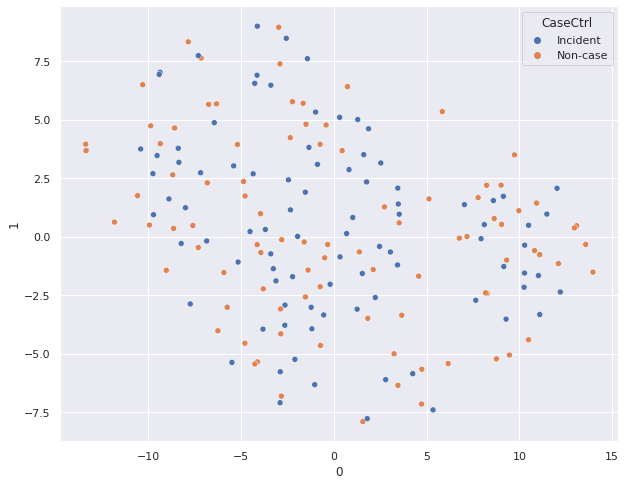

----------------------------------------------------------------------------------------------------
Typ_Tumo


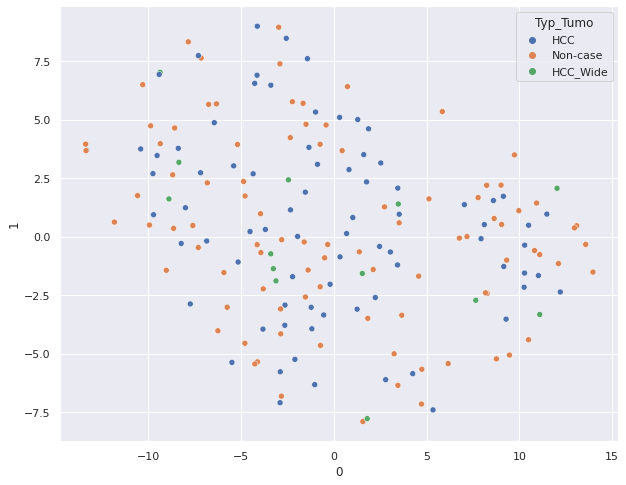

----------------------------------------------------------------------------------------------------
Country


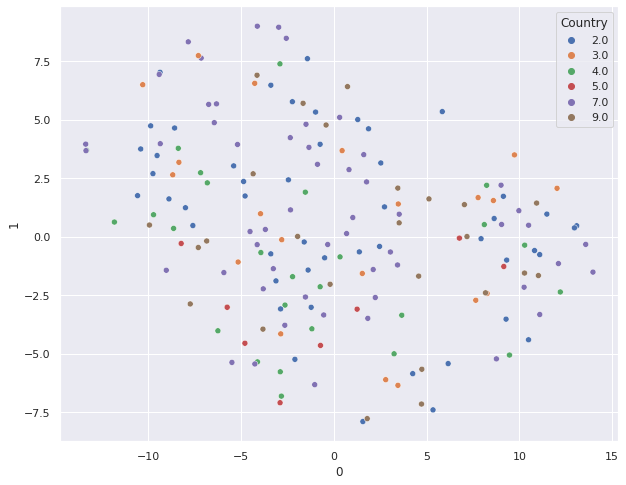

----------------------------------------------------------------------------------------------------
Cntr_A


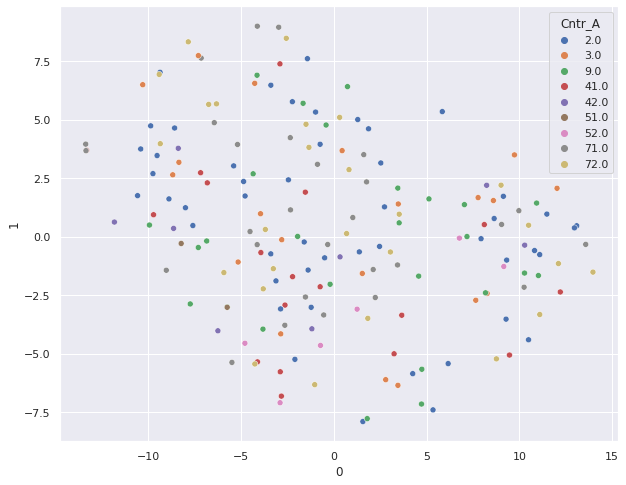

----------------------------------------------------------------------------------------------------
Sex


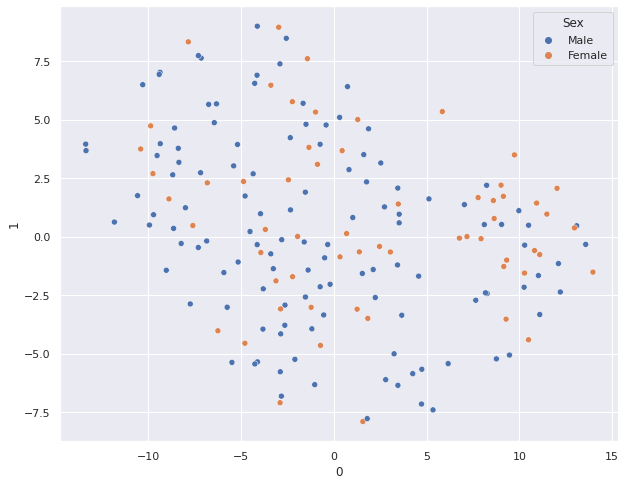

----------------------------------------------------------------------------------------------------
Smoke_Stat


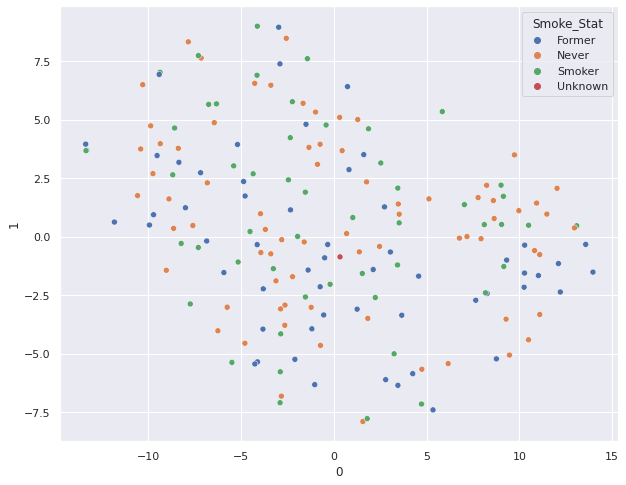

----------------------------------------------------------------------------------------------------
Vit_Stat


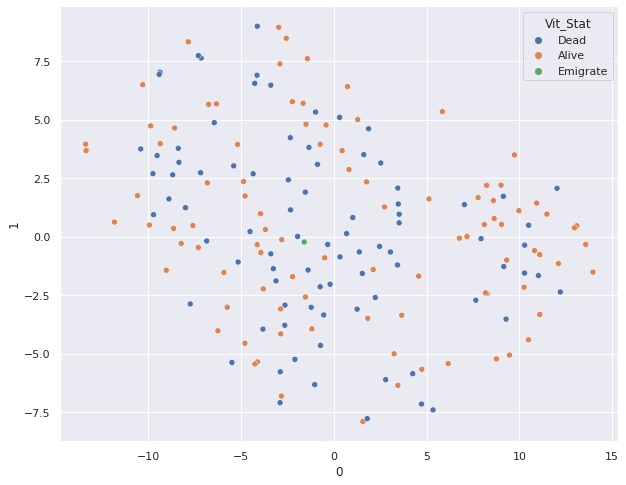

----------------------------------------------------------------------------------------------------


In [196]:
n_components = 2
X_tSNE = TSNE(n_components=n_components, learning_rate='auto', init='random').fit_transform(peakTable_quanti_without_Blanks_no_na)
X_tSNE.shape

for target in targets:
    
    print(target)
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=0, y=1, data=pd.DataFrame(X_tSNE), hue=peakTable_without_Blanks[target], legend='full', palette='deep');
    plt.show()
    print(100 * '-')

/tmp/ipykernel_28689/2053613455.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


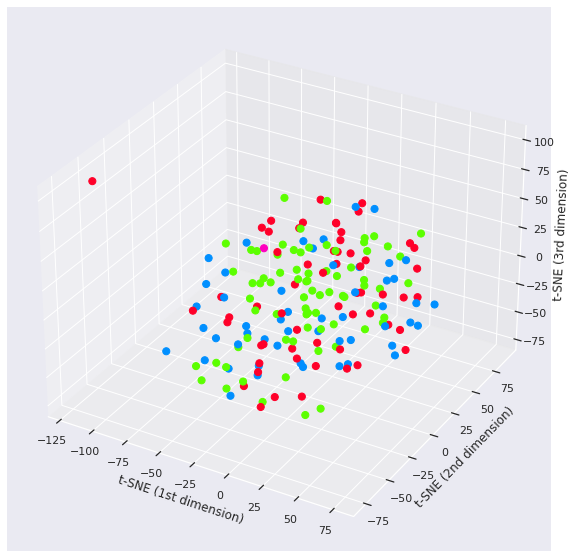

In [234]:
n_components = 3
X_tSNE = TSNE(n_components=n_components, learning_rate='auto', init='random').fit_transform(peakTable_quanti_without_Blanks_no_na)
X_tSNE.shape

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X_tSNE[:,0], 
    ys=X_tSNE[:,1], 
    zs=X_tSNE[:,2], 
    c=LabelEncoder().fit_transform(peakTable_without_Blanks['Smoke_Stat']), 
    cmap='gist_rainbow',
    s=50,
    alpha=1
)
ax.set_xlabel('t-SNE (1st dimension)')
ax.set_ylabel('t-SNE (2nd dimension)')
ax.set_zlabel('t-SNE (3rd dimension)')
plt.show()

In [ ]:
## Compute t-SNE
#n_components = 3
#start_time = time.time()
#X_tSNE = TSNE(n_components=n_components, learning_rate='auto', init='random').fit_transform(peakTable_quanti_without_Blanks_no_na)
#print(f'Time to compute t-SNE (input dataframe of shape {peakTable_quanti_without_Blanks_no_na.shape}) : {time.time() - start_time :.2f} seconds\n')


## Plot 3D t-SNE reduction
for target in targets:
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection = '3d')
    
    le = LabelEncoder()
    le.fit(peakTable_without_Blanks[target])
    encoded_labels = le.transform(peakTable_without_Blanks[target])
    print(encoded_labels)
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    print(le_name_mapping.keys().values())
    
    #encoded_labels = le.fit_transform(peakTable_without_Blanks[target])
    #reversed_labels = le.inverse_transform(encoded_labels)
    
    scatter = ax.scatter(
        xs=X_tSNE[:,0], 
        ys=X_tSNE[:,1], 
        zs=X_tSNE[:,2],
        c=encoded_labels, 
        cmap='rainbow',
        s=50,
        alpha=1
    )
    
    ax.set_title(f't-SNE colored by {target}', fontsize=18)
    ax.set_xlabel('t-SNE 1st dimension')
    ax.set_ylabel('t-SNE 2nd dimension')
    ax.set_zlabel('t-SNE 3rd dimension')
    
    #legend1 = ax.legend(*scatter.legend_elements(), loc='upper right', title=target)
    
    #print(*scatter.legend_elements())
    #print(reversed_labels)
    #legend1 = ax.legend(reversed_labels, loc='upper right', title=target)
    
    legend1 = ax.legend(le_name_mapping.keys(), loc='upper right', title=target)
    ax.add_artist(legend1)
    
    plt.show()
    
    print(100 * '-', '\n')
    
    break

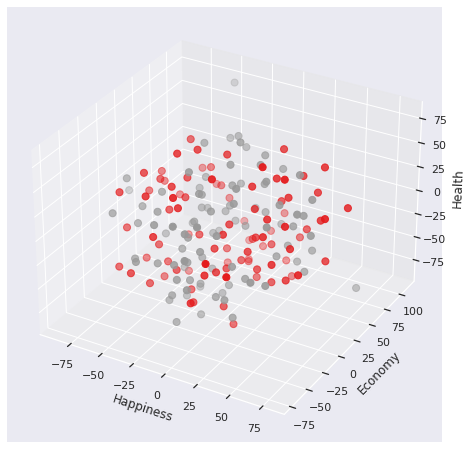

In [216]:
from mpl_toolkits.mplot3d import Axes3D

#sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X_tSNE[:,0]
y = X_tSNE[:,1]
z = X_tSNE[:,2]

ax.set_xlabel("Happiness")
ax.set_ylabel("Economy")
ax.set_zlabel("Health")

ax.scatter(x, y, z,
           s=50,
           c=LabelEncoder().fit_transform(peakTable_without_Blanks['CaseCtrl']), 
           cmap='Set1')

plt.show()

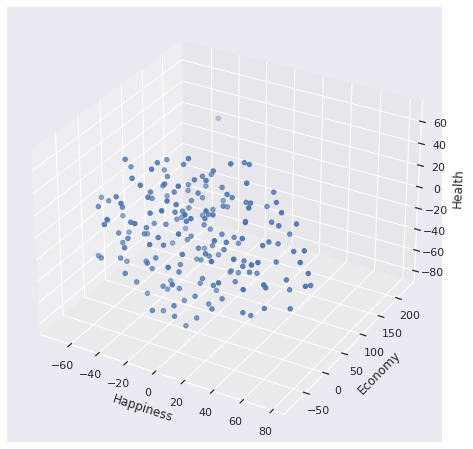

In [245]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("Happiness")
ax.set_ylabel("Economy")
ax.set_zlabel("Health")

ax.scatter(X_tSNE[:,0], X_tSNE[:,1], X_tSNE[:,2])

plt.show()

/tmp/ipykernel_28689/23298938.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


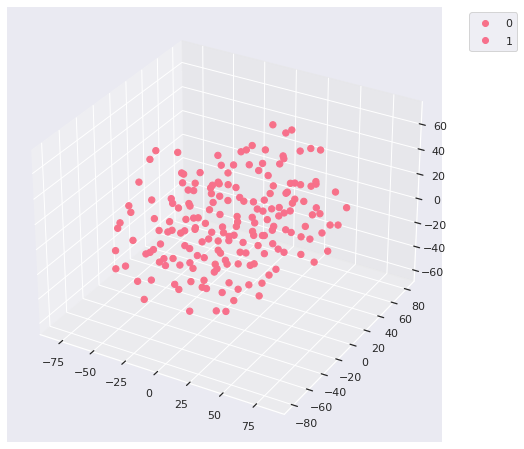

In [162]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
target = LabelEncoder().fit_transform(y)
sc = ax.scatter(X_tSNE[:,0], X_tSNE[:,1], X_tSNE[:,2], s=40, c=target, marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

In [139]:
sns.scatterplot(X_tSNE[:,0], X_tSNE[:,1], hue=y, legend='full', palette=palette);

In [183]:
metadata = peakTable.iloc[:, ['variable' not in col for col in peakTable.columns]]
metadata

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B
...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C


In [184]:
X = peakTable.iloc[:, ['variable' in col for col in peakTable.columns]]
X

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,0.343154,0.028213,0.403068,-0.723907,0.292690,0.734648,0.454773,0.025521,1.727030,0.590418,...,0.677597,0.423164,-1.400209,0.240557,-2.650112,-0.450923,0.007627,-0.605720,-0.866681,-0.702342
1,0.514293,1.561149,-2.358937,-0.785405,-0.303024,-2.109607,0.907843,-0.497925,-0.408785,-2.637934,...,-0.764355,0.082389,-1.691867,0.524777,0.312977,0.969049,0.987275,0.839022,-0.788942,-1.081942
2,-0.966684,2.485037,0.902786,-0.487741,-0.951130,0.125416,0.549394,0.395810,0.009166,-0.094654,...,-0.716359,-0.533313,-2.338208,-0.448139,-0.692877,-0.061555,-0.308102,-0.557681,-0.267428,0.021739
3,-0.499471,2.294042,0.654866,0.200169,1.013887,1.022829,-0.895230,-0.509404,0.862195,1.225857,...,-0.623066,-0.511709,-0.896577,0.460528,-0.868587,-0.379402,-0.041673,-0.878755,-2.822468,-0.555637
4,0.789406,0.370597,1.186125,-1.139745,-0.288708,0.235699,-0.056561,-0.896501,0.840488,-0.160630,...,-0.646925,-0.792683,0.113281,-0.301686,-0.091928,0.107454,-0.002273,0.534238,-0.757552,0.268754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1.198158,0.236352,-1.742032,0.659971,-0.497824,-1.440565,0.410328,-1.211965,-1.165634,-1.536160,...,-0.711742,-1.595635,-0.141981,-0.366404,-1.113986,-3.361035,0.435091,-0.816180,0.084109,-0.001943
182,-0.232292,1.056631,-1.337454,-0.345675,-1.122356,-0.062979,0.072807,-0.389213,1.481026,-0.550822,...,2.069408,0.135651,1.065614,-0.872576,0.369971,0.422004,-0.657858,1.670263,1.473349,1.106209
183,0.002991,0.066335,-0.175633,0.289933,-0.957686,-0.848193,-0.211333,0.888016,-0.324560,-1.040175,...,1.828458,1.319586,-0.752464,-0.255708,0.590072,3.012478,0.245043,0.309170,0.306393,0.128377
184,-0.984124,0.429884,-1.131698,-0.712588,-1.491989,-2.069547,-0.398063,0.506517,0.733195,-2.292864,...,-0.772941,-0.673446,0.064045,-0.456010,-0.519668,-2.125012,0.127153,-1.784431,0.481025,0.137774


# K-Means

### Cluster samples

#### Reduce data with 2-component PCA to observe the results

#### With only 2 clusters (maybe Incident vs. Non-case will be separated)

After PCA reduction, % explained variance remaining : 18.38%



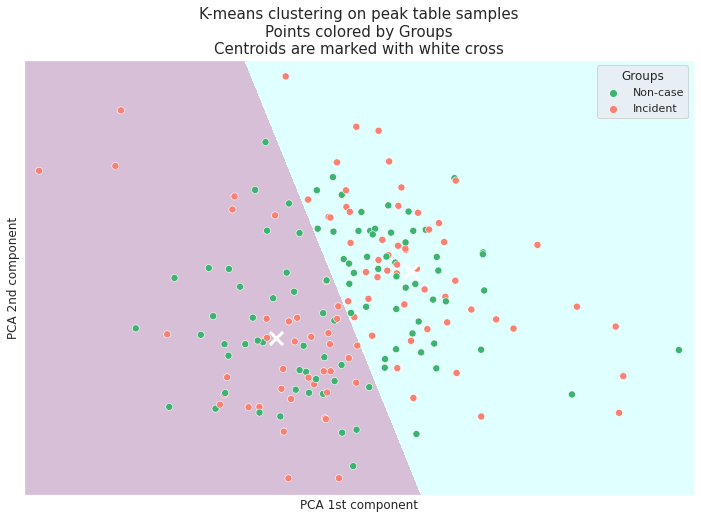

Inertia of k-means model : 7018.91
Adjusted rand index of k-means model : -0.003


In [428]:
# Number of clusters for KMeans
n_clusters = 2
n_components = 2

# Reduce data with a 2-component PCA
PCA_model = PCA(n_components=n_components)
reduced_data = PCA_model.fit_transform(X)
print(f'After PCA reduction, % explained variance remaining : {np.sum(PCA_model.explained_variance_ratio_) * 100 :.2f}%\n')

# Perform k-means
kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=0)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.01  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Set figure
plt.figure(figsize=(12, 8))

# Prepare cmap to fill with chosen colors
#colors = ['pink', 'mediumaquamarine']
colors = ['thistle', 'lightcyan']
bounds = [0, 1]
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Fill the areas with selected colors
plt.imshow(
    Z,
    interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=cmap,
    aspect='auto',
    origin='lower',
)

# Plot points with their 2 PCA components
# and color based on sample group
points = pd.DataFrame(reduced_data, columns=['x', 'y'])
points['Groups'] = peakTable['Groups']

palette = {'Incident': 'salmon', 'Non-case': 'mediumseagreen'}
sns.scatterplot(x='x',
                y='y',
                data=points,
                hue='Groups',
                hue_order=['Non-case', 'Incident'],
                palette=palette,
                s=50)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='x',
    s=170,
    linewidths=3,
    color='w',
    zorder=1,
)

# Set figure characteristics
plt.title(
    'K-means clustering on peak table samples\n'
    'Points colored by Groups\n'
    'Centroids are marked with white cross',
    fontsize=15
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('PCA 1st component')
plt.ylabel('PCA 2nd component')
plt.show()


print(f'Inertia of k-means model : {kmeans.inertia_ :.2f}')


labels_true = peakTable['Groups']
labels_true = LabelEncoder().fit_transform(labels_true)
labels_predict = kmeans.labels_
print(f'Adjusted rand index of k-means model : {metrics.adjusted_rand_score(labels_true, labels_predict) :.3f}')

#### We can observe that the two groups don't separate at all. The adjusted rand index is close to 0 which means the predicted labels are bad prediction of the true labels

#### One major reason is that keeping only the 2 principal components for the PCA model only keeps a really small amount of the initial variance

#### With 3 clusters (maybe HCC vs. HCC_Wide vs. Non-case will be separated)

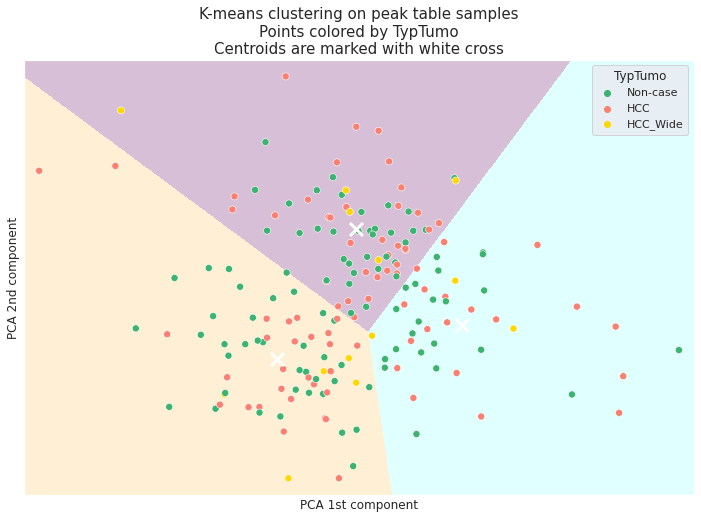

Inertia of k-means model : 5031.24
Adjusted rand index of k-means model : -0.006


In [432]:
# Number of clusters for KMeans
n_clusters = 3

# Reduce data with a 2-component PCA 
reduced_data = PCA(n_components=2).fit_transform(X)

# Perform k-means
kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=0)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Set figure
plt.figure(figsize=(12, 8))

# Prepare cmap to fill with chosen colors
#colors = ['pink', 'mediumaquamarine']
colors = ['thistle', 'lightcyan', 'papayawhip']
bounds = [0, 1, 2]
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Fill the areas with selected colors
plt.imshow(
    Z,
    interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=cmap,
    aspect='auto',
    origin='lower',
)

# Plot points with their 2 PCA components
# and color based on sample group
points = pd.DataFrame(reduced_data, columns=['x', 'y'])
points['TypTumo'] = peakTable['TypTumo']
points['TypTumo'] = points['TypTumo'].fillna('Non-case')

palette = {'Non-case': 'mediumseagreen', 'HCC': 'salmon', 'HCC_Wide': 'gold'}
sns.scatterplot(x='x',
                y='y',
                data=points,
                hue='TypTumo',
                hue_order=['Non-case', 'HCC', 'HCC_Wide'],
                palette=palette,
                s=50)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='x',
    s=170,
    linewidths=3,
    color='w',
    zorder=1,
)

# Set figure characteristics
plt.title(
    'K-means clustering on peak table samples\n'
    'Points colored by TypTumo\n'
    'Centroids are marked with white cross',
    fontsize=15
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('PCA 1st component')
plt.ylabel('PCA 2nd component')
plt.show()


print(f'Inertia of k-means model : {kmeans.inertia_ :.2f}')


labels_true = peakTable['TypTumo']
labels_true = labels_true.fillna('Non-case')
labels_true = LabelEncoder().fit_transform(labels_true)
labels_predict = kmeans.labels_

print(f'Adjusted rand index of k-means model : {metrics.adjusted_rand_score(labels_true, labels_predict) :.3f}')

#### Same here, we can observe that the three groups don't separate at all. The adjusted rand index is close to 0 which means the predicted labels are bad prediction of the true labels

0.014237377122007797
11


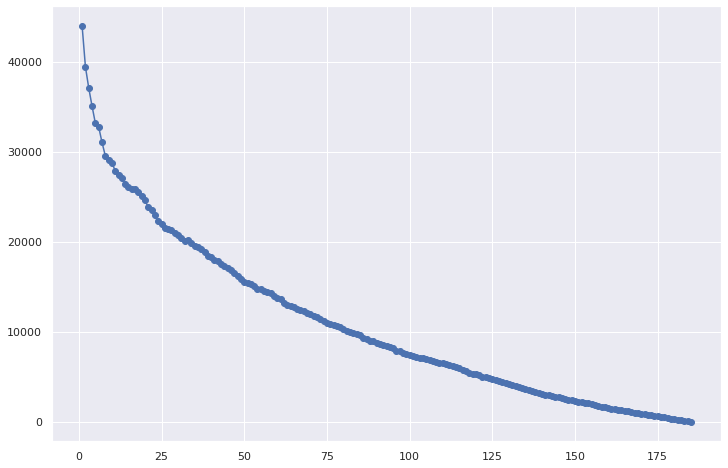

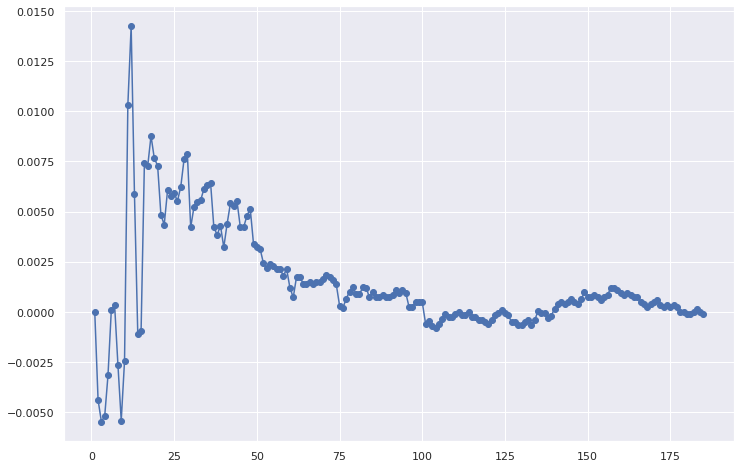

In [433]:
n_clusters = X.shape[0]
#n_clusters = 10

inertia = []
rand_score = []

labels_true = peakTable['Groups']
labels_true = LabelEncoder().fit_transform(labels_true)

reduced_data = PCA(n_components=31).fit_transform(X)

for i in range(1, n_clusters):
    
    kmeans = KMeans(n_clusters=i, n_init=1, init='k-means++', random_state=0).fit(reduced_data)

    inertia.append(kmeans.inertia_)
    
    labels_predict = kmeans.labels_
    rand_score.append(metrics.adjusted_rand_score(labels_predict, labels_true))
    

print(max(rand_score))
print(rand_score.index(max(rand_score)))


plt.scatter(np.arange(1, n_clusters), inertia)
plt.plot(np.arange(1, n_clusters), inertia)
plt.show()


plt.scatter(np.arange(1, n_clusters), rand_score)
plt.plot(np.arange(1, n_clusters), rand_score)
plt.show()

In [373]:
# Number of clusters for KMeans
n_clusters = 2
n_components = 31

# Reduce data with a 2-component PCA
PCA_model = PCA(n_components=n_components)
reduced_data = PCA_model.fit_transform(X)
print(f'--> % explained variance : {np.sum(PCA_model.explained_variance_ratio_) * 100 :.2f}%')

# Perform k-means
kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=0)
kmeans.fit(reduced_data)

labels_true = peakTable['Groups']
labels_true = LabelEncoder().fit_transform(labels_true)
print(labels_true)

labels_pred = kmeans.labels_
print(labels_pred)

print(f'--> Adjusted rand index : {metrics.adjusted_rand_score(list(labels_true), labels_pred) :.2f}')


--> % explained variance : 70.09%
[0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0
 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
--> Adjusted rand index : -0.00


In [185]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

In [186]:
kmeans.labels_

array([7, 4, 4, 7, 2, 2, 4, 4, 2, 2, 7, 7, 7, 7, 2, 7, 2, 4, 8, 4, 7, 2,
       4, 4, 7, 2, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 2, 2,
       2, 4, 4, 4, 7, 7, 7, 2, 2, 2, 1, 4, 2, 4, 7, 7, 2, 2, 0, 8, 5, 6,
       0, 0, 0, 7, 5, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 3, 6, 3, 3, 3,
       3, 0, 2, 1, 7, 3, 3, 3, 1, 1, 0, 0, 1, 3, 9, 1, 1, 3, 3, 3, 1, 1,
       0, 3, 0, 1, 3, 1, 0, 9, 3, 1, 1, 0, 3, 0, 1, 1, 1, 1, 9, 5, 7, 6,
       5, 5, 5, 5, 5, 1, 0, 0, 1, 5, 3, 3, 3, 9, 3, 5, 9, 9, 5, 1, 1, 3,
       9, 6, 3, 9, 9, 9, 9, 9, 3, 9, 3, 9, 6, 1, 1, 1, 5, 1, 9, 1, 9, 9,
       9, 9, 9, 3, 1, 9, 9, 1, 9, 6], dtype=int32)

In [187]:
target = peakTable['Groups']

In [188]:
from sklearn.manifold import TSNE

tSNE=TSNE(n_components=2)

tSNE_result=tSNE.fit_transform(X)
tSNE_result.shape

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(186, 2)

In [189]:
x=tSNE_result[:,0]
y=tSNE_result[:,1]
#z=tSNE_result[:,2]

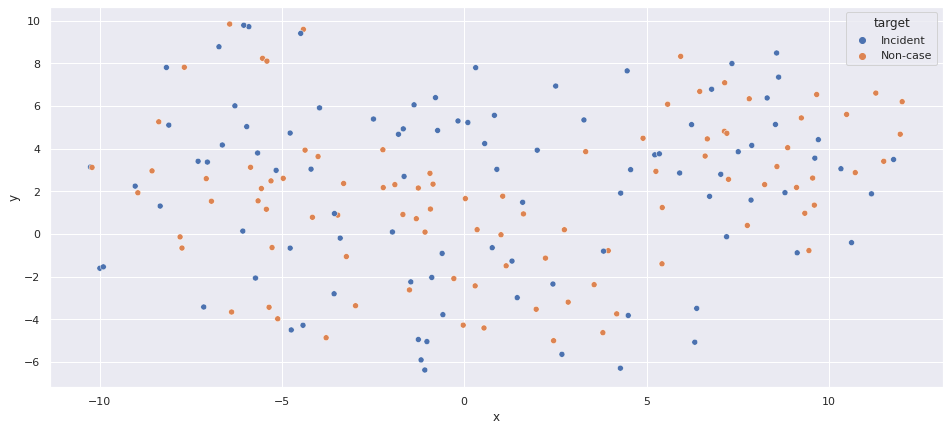

In [190]:
import pandas as pd
import seaborn as sns

#df = pd.DataFrame(tSNE_result,columns=['tSNE_x', 'tSNE_Y'])
df = X.copy()
df['target']=target
df['x']=x
df['y']=y

plt.figure(figsize=(16,7))
sns.scatterplot(x='x',y='y',hue='target',data=df,
               legend="full")
plt.show()

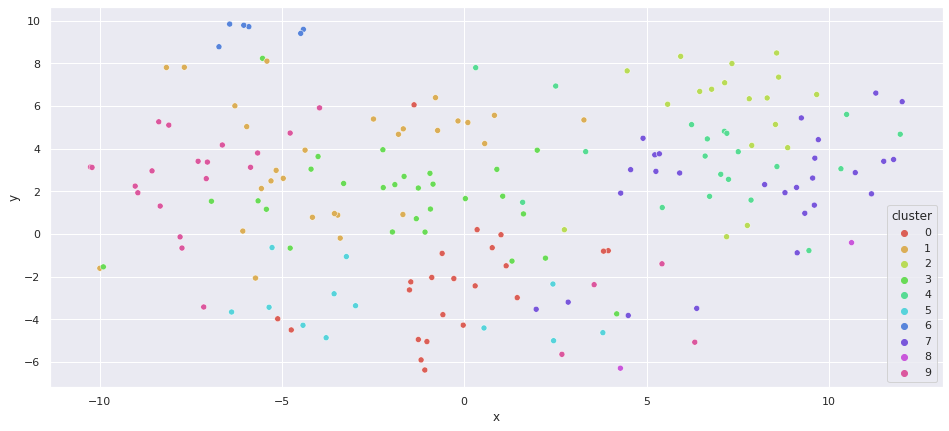

In [191]:
import pandas as pd
import seaborn as sns

#df = pd.DataFrame(tSNE_result,columns=['tSNE_x', 'tSNE_Y'])
df = X.copy()
df['target']=target
df['x']=x
df['y']=y
df['cluster']=kmeans.labels_

plt.figure(figsize=(16,7))
sns.scatterplot(x='x',y='y',hue='cluster',data=df,
                palette=sns.color_palette('hls',10),
                legend='full')
plt.show()

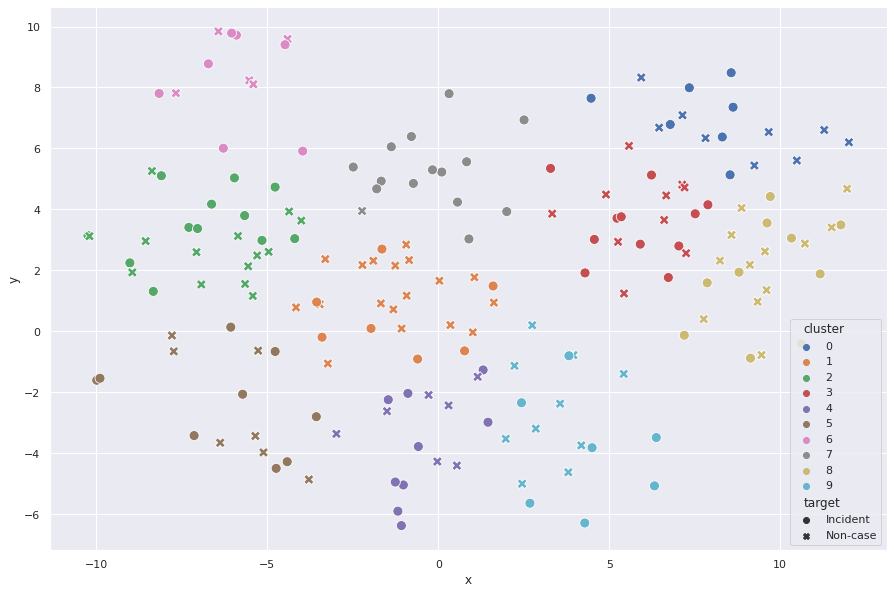

In [203]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(tSNE_result)
kmeans.labels_

df = X.copy()
df['target']=target
df['x']=x
df['y']=y
df['cluster']=kmeans.labels_

plt.figure(figsize=(15,10))
sns.scatterplot(x='x',y='y',
                hue='cluster',
                style='target',
                data=df,
                s=100,
                palette='deep',
                legend='full')
plt.show()